In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
import csv as csv

In [5]:
import scipy.stats.distributions as dist

In [6]:
import matplotlib.pyplot as plot

In [7]:
import seaborn as sns
#for reference https://seaborn.pydata.org/tutorial/distributions.html

STEP 1: CLEANING DATA

The first step is to clean the Demographics data. 

In [8]:
Demographics=pd.read_csv("../Obtaining_Data/Demographics.csv")


Initially, occupations had nine categories; Not Stated, Labourers, Community Workers, Sales Workers, Clerical Workers, Technicians, Managers and Professionals. In order to analyse the impact of the COVID-19 pandemic, these occupations were grouped into two groups; Jobs Requiring a Tertiary Qualification and Jobs not requiring a Tertiary Qualification. Jobs requiring a Tertiary Qualification include Managers, Technicians and Professionals. Jobs not requiring a Tertiary Qualification are all the other occupations listed. It is assumed that if a person did not state their job, it did not require a tertiary qualification 

In [9]:
#consolidating occupation data into 2 categories; jobs requiring a tertiary qualification and jobs not requiring a tertiary qualification

Demographics["Job requires Tertiary qualification"]=Demographics["Technicians"]+Demographics["Managers"]+Demographics["Professionals"]
Demographics["Job Does not require a Tertiary qualification"]=Demographics["Not Stated"]+Demographics["Machinery"]+Demographics["Labourers"]+Demographics["Community"]+Demographics["Sales"]+Demographics["Clerical"]
Demographics["Total Surveyed for Job"]=Demographics["Job requires Tertiary qualification"]+Demographics["Job Does not require a Tertiary qualification"]




The percentage of people holding a Tertiary Qualification and not holding a Tertiary Qualification was obtained in order to use in the analysis. Percentages rather than the Frequency was used in the analysis to account for the fact that different suburbs have a different number of people and thus using Frequency may not be a fair comparison when comparing acorss suburbs. 

In [10]:
#Total Percentage of people holding jobs that require tertiary and do not require tertiary
Demographics["% holding Job requiring Tertiary"]=(Demographics["Job requires Tertiary qualification"]/Demographics["Total Surveyed for Job"])*100
Demographics["% holding job not requiring Tertiary"]=(Demographics["Job Does not require a Tertiary qualification"]/Demographics["Total Surveyed for Job"])*100



A similar analysis for the proportion of migrants was done in each suburb. The API call included people born in each country, the total amount of people in each suburb and the number of people born in Australia in each suburb. Thus, to obtain the number of people not born in Australia, the number of people born in Australia each suburb was subtracted from the number of people overall. Once again percentages were obtained in the analysis.

In [11]:
#Percentage of migrants in each suburb who are born within and outside of Australia 
Demographics["Born outside of Australia"]=Demographics["Total"]-Demographics["Born in Australia"]
Demographics["Percent born in Aus"]=(Demographics["Born in Australia"]/Demographics["Total"])*100
Demographics["Percent born outside of Aus"]=(Demographics["Born outside of Australia"]/Demographics["Total"])*100
Demographics.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Suburb,ID,0 to 4,5 to 19,20 to 39,40 to 59,60+,...,Born in Australia,Total,Job requires Tertiary qualification,Job Does not require a Tertiary qualification,Total Surveyed for Job,% holding Job requiring Tertiary,% holding job not requiring Tertiary,Born outside of Australia,Percent born in Aus,Percent born outside of Aus
0,0,0,0,Abbotsford,627,319.0,535.0,4740.0,1582.0,997.0,...,4512.0,8184.0,3435.0,1743.0,5178.0,66.338355,33.661645,3672.0,55.131965,44.868035
1,1,1,1,Aberfeldie,647,179.0,897.0,850.0,1281.0,684.0,...,3021.0,3897.0,1166.0,953.0,2119.0,55.025956,44.974044,876.0,77.521170,22.478830
2,2,2,2,Airport West,757,463.0,1012.0,2240.0,1920.0,1932.0,...,5064.0,7564.0,1727.0,1883.0,3610.0,47.839335,52.160665,2500.0,66.948704,33.051296
3,3,3,3,Albanvale,787,371.0,1000.0,1621.0,1373.0,1129.0,...,2287.0,5491.0,641.0,1404.0,2045.0,31.344743,68.655257,3204.0,41.649973,58.350027
4,4,4,4,Albert Park,797,367.0,938.0,1469.0,1943.0,1493.0,...,4095.0,6215.0,2128.0,941.0,3069.0,69.338547,30.661453,2120.0,65.888978,34.111022


Lastly to clean the demographics dataset, redundant columns were removed. Thus, all the individual occupations were removed. 

In [12]:
#Dataset only including the clean and formatted data
Demographics=Demographics[["Suburb", "ID", "0 to 4", "5 to 19", "20 to 39", "40 to 59", "60+", "Job requires Tertiary qualification", "Job Does not require a Tertiary qualification", "% holding Job requiring Tertiary", "% holding job not requiring Tertiary", "Born in Australia", "Born outside of Australia", "Percent born in Aus", "Percent born outside of Aus"]]

Demographics.to_csv("Demographics_edited.csv")

Next, both the Median Price dataset and the edited Demographics datset were loaded into the Jupyter notebook in order to continue the analysis

In [13]:
house_price_data_to_load="../Obtaining_Data/Jan_Apr_2020_data.csv"
demographic_data_to_load="Demographics_edited.csv"

In [14]:
house_data=pd.read_csv(house_price_data_to_load)
demographic_data=pd.read_csv(demographic_data_to_load)

In [15]:
house_data.head()

,Unnamed: 0,Unnamed: 0.1,Suburb,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold
0,0,0,Abbotsford,627,1110000.0,1115000.0,18.0,16.0
1,1,1,Aberfeldie,647,NaN,1520000.0,8.0,11.0
2,2,2,Airport West,757,840000.0,785000.0,32.0,25.0
3,3,3,Albanvale,787,530000.0,540000.0,14.0,11.0
4,4,4,Albert Park,797,2423000.0,1679000.0,26.0,30.0


In [16]:
type(house_data)

pandas.core.frame.DataFrame

The dataset comprising of the Median Price in suburbs and the dataset comprising of the Demographics were then both merged together using the Suburb ID column 

In [17]:
house_data_complete = pd.merge(house_data, demographic_data, how="left", on=["ID", "ID"])
house_data_complete.head()

,Unnamed: 0_x,Unnamed: 0.1,Suburb_x,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold,Unnamed: 0_y,Suburb_y,...,40 to 59,60+,Job requires Tertiary qualification,Job Does not require a Tertiary qualification,% holding Job requiring Tertiary,% holding job not requiring Tertiary,Born in Australia,Born outside of Australia,Percent born in Aus,Percent born outside of Aus
0,0,0,Abbotsford,627,1110000.0,1115000.0,18.0,16.0,0,Abbotsford,...,1582.0,997.0,3435.0,1743.0,66.338355,33.661645,4512.0,3672.0,55.131965,44.868035
1,1,1,Aberfeldie,647,NaN,1520000.0,8.0,11.0,1,Aberfeldie,...,1281.0,684.0,1166.0,953.0,55.025956,44.974044,3021.0,876.0,77.521170,22.478830
2,2,2,Airport West,757,840000.0,785000.0,32.0,25.0,2,Airport West,...,1920.0,1932.0,1727.0,1883.0,47.839335,52.160665,5064.0,2500.0,66.948704,33.051296
3,3,3,Albanvale,787,530000.0,540000.0,14.0,11.0,3,Albanvale,...,1373.0,1129.0,641.0,1404.0,31.344743,68.655257,2287.0,3204.0,41.649973,58.350027
4,4,4,Albert Park,797,2423000.0,1679000.0,26.0,30.0,4,Albert Park,...,1943.0,1493.0,2128.0,941.0,69.338547,30.661453,4095.0,2120.0,65.888978,34.111022


After the merge, the combined dataset was then further cleaned by dropping any redundant rows such as Suburb_y and dropping any rows that did not have values for the median price in January.

In [18]:
#Drop redundant or duplicate columns after merge
house_data_complete.drop(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y', 'Suburb_y'], axis=1, inplace=True)

In [19]:
#Drop rows without values for key variables, eg. no observed median price or sales, or missing demographic data
house_data_complete.dropna(subset = ["Jan 2020 Median", "April 2020 Median", "% holding job not requiring Tertiary", "Percent born in Aus"], inplace=True)

Two columns were then added in order to get the total population. This then allowed for further analysis and cleaning by determining the percentage of people in each age group for each suburb, which is comppleted in the cless below. 

In [20]:
#Add two columns to get total suburb population

In [21]:
house_data_complete["Total Population"]=(house_data_complete["Born in Australia"]+house_data_complete["Born outside of Australia"])

In [22]:
house_data_complete.head()

,Suburb_x,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold,0 to 4,5 to 19,20 to 39,40 to 59,60+,Job requires Tertiary qualification,Job Does not require a Tertiary qualification,% holding Job requiring Tertiary,% holding job not requiring Tertiary,Born in Australia,Born outside of Australia,Percent born in Aus,Percent born outside of Aus,Total Population
0,Abbotsford,627,1110000.0,1115000.0,18.0,16.0,319.0,535.0,4740.0,1582.0,997.0,3435.0,1743.0,66.338355,33.661645,4512.0,3672.0,55.131965,44.868035,8184.0
2,Airport West,757,840000.0,785000.0,32.0,25.0,463.0,1012.0,2240.0,1920.0,1932.0,1727.0,1883.0,47.839335,52.160665,5064.0,2500.0,66.948704,33.051296,7564.0
3,Albanvale,787,530000.0,540000.0,14.0,11.0,371.0,1000.0,1621.0,1373.0,1129.0,641.0,1404.0,31.344743,68.655257,2287.0,3204.0,41.649973,58.350027,5491.0
4,Albert Park,797,2423000.0,1679000.0,26.0,30.0,367.0,938.0,1469.0,1943.0,1493.0,2128.0,941.0,69.338547,30.661453,4095.0,2120.0,65.888978,34.111022,6215.0
6,Alphington,1047,1718000.0,1471000.0,12.0,16.0,222.0,955.0,1443.0,1585.0,881.0,1854.0,968.0,65.698086,34.301914,3765.0,1315.0,74.114173,25.885827,5080.0


In [23]:
#Identify change in median house prices between February 2020 and April 2020, by suburb

In [24]:
house_data_complete["House_price_delta"]=(house_data_complete["April 2020 Median"]-house_data_complete["Jan 2020 Median"])/house_data_complete["Jan 2020 Median"]

In [25]:
house_data_complete["% 20 to 39"]=(house_data_complete["20 to 39"])/house_data_complete["Total Population"]

In [26]:
house_data_complete["% 60+"]=(house_data_complete["60+"])/house_data_complete["Total Population"]

In [27]:
house_data_complete["% 0 to 4"]=(house_data_complete["0 to 4"])/house_data_complete["Total Population"]

In [28]:
house_data_complete.head()

,Suburb_x,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold,0 to 4,5 to 19,20 to 39,40 to 59,...,% holding job not requiring Tertiary,Born in Australia,Born outside of Australia,Percent born in Aus,Percent born outside of Aus,Total Population,House_price_delta,% 20 to 39,% 60+,% 0 to 4
0,Abbotsford,627,1110000.0,1115000.0,18.0,16.0,319.0,535.0,4740.0,1582.0,...,33.661645,4512.0,3672.0,55.131965,44.868035,8184.0,0.004505,0.579179,0.121823,0.038978
2,Airport West,757,840000.0,785000.0,32.0,25.0,463.0,1012.0,2240.0,1920.0,...,52.160665,5064.0,2500.0,66.948704,33.051296,7564.0,-0.065476,0.296140,0.255420,0.061211
3,Albanvale,787,530000.0,540000.0,14.0,11.0,371.0,1000.0,1621.0,1373.0,...,68.655257,2287.0,3204.0,41.649973,58.350027,5491.0,0.018868,0.295210,0.205609,0.067565
4,Albert Park,797,2423000.0,1679000.0,26.0,30.0,367.0,938.0,1469.0,1943.0,...,30.661453,4095.0,2120.0,65.888978,34.111022,6215.0,-0.307057,0.236364,0.240225,0.059051
6,Alphington,1047,1718000.0,1471000.0,12.0,16.0,222.0,955.0,1443.0,1585.0,...,34.301914,3765.0,1315.0,74.114173,25.885827,5080.0,-0.143772,0.284055,0.173425,0.043701


STEP 2: ANALYSING DATA

With the cleaning process completely finished, the next step is to try and answer the relevant questions asked by the analysis. The first question asked in the Project was "How are house prices affected by the COVD-19 pandemic". The hypothesis was that the median prices of houses would drop. In order to answer this, a Normal Dsitrbution polt with percentage change in house prices for overall Melbourne from Jan 2020 to April 2020 as the x-variable was graphed as shown below.  

In [29]:
#Plot the distribution of median house price deltas

House price delta Mean: -0.010849
House price delta Std Dev: 0.093371
House price delta Skewness: -1.384387
House price delta Kurtosis: 8.746486


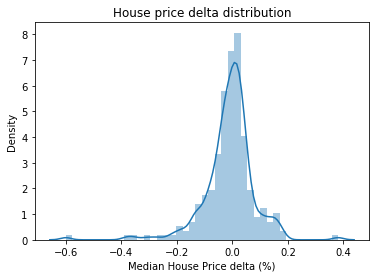

In [30]:
delta_plot=sns.distplot(house_data_complete["House_price_delta"])
print("House price delta Mean: %f" % house_data_complete["House_price_delta"].mean())
print("House price delta Std Dev: %f" % house_data_complete["House_price_delta"].std())
print("House price delta Skewness: %f" % house_data_complete["House_price_delta"].skew())
print("House price delta Kurtosis: %f" % house_data_complete["House_price_delta"].kurt())

plot.title("House price delta distribution")
plot.xlabel("Median House Price delta (%)")
plot.ylabel("Density")
 
plot.show()

In [31]:
fig1=delta_plot.get_figure()

In [32]:
fig1.savefig('delta_distribution.png')

The plot above showed that the distribution of median house price changes "House_price_delta" seems broadly normal, if somewhat negatively skewed. To do some further analysis, the Median price of houses in both Jan 2020 and April 2020 were graphed together. 

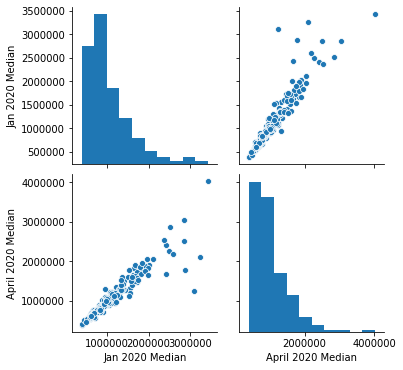

In [33]:
median_plot = sns.pairplot(house_data_complete, vars=["Jan 2020 Median", "April 2020 Median"])

Jan Mean: 1053340.163934
Jan Std Dev: 545277.808028
Jan Skewness: 1.805127
Jan Kurtosis: 3.748450
Apr Mean: 1023286.885246
Apr Std Dev: 497831.048398
Apr Skewness: 2.038810
Apr Kurtosis: 6.524115


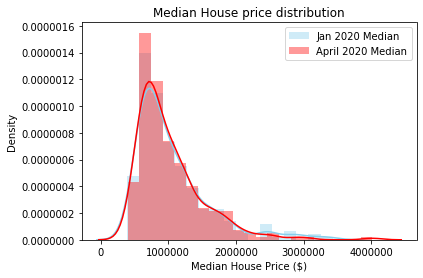

In [34]:
sns.distplot( house_data_complete["Jan 2020 Median"] , norm_hist=False, kde=True, color="skyblue", label="Jan 2020 Median")
houseplot=sns.distplot( house_data_complete["April 2020 Median"], norm_hist=False, kde=True, color="red", label="April 2020 Median")
print("Jan Mean: %f" % house_data_complete["Jan 2020 Median"].mean())
print("Jan Std Dev: %f" % house_data_complete["Jan 2020 Median"].std())
print("Jan Skewness: %f" % house_data_complete["Jan 2020 Median"].skew())
print("Jan Kurtosis: %f" % house_data_complete["Jan 2020 Median"].kurt())

print("Apr Mean: %f" % house_data_complete["April 2020 Median"].mean())
print("Apr Std Dev: %f" % house_data_complete["April 2020 Median"].std())
print("Apr Skewness: %f" % house_data_complete["April 2020 Median"].skew())
print("Apr Kurtosis: %f" % house_data_complete["April 2020 Median"].kurt())


plot.legend()
plot.title("Median House price distribution")
plot.xlabel("Median House Price ($)")
plot.ylabel("Density")
 
plot.show()

In [35]:
fig2=houseplot.get_figure()

In [36]:
fig2.savefig('Median_house_distribution.png', bbox_inches="tight")

The graph plot shows that the median house price graph in April 2020 and January 2020 are roughly similar. However, it was noted that January 2020 had houses that were sold at migh higher prices than April 2020, so the April 2020 graph was more condensed. In order to further analyse whether the mean house prices are similar a hypothesis test was also conducted between the two months to test for statistically significant differences. The steps are shown below:

In [37]:
#Identify Average change in median house prices for all suburbs between February 2020 and April 2020

In [38]:
avg_price_change=house_data_complete["House_price_delta"].mean()
avg_price_change

-0.010849456641705361

In [39]:
#Calculate and store as variables information necessary for a hypothesis test regarding the mean change in median house prices
#For reference: https://towardsdatascience.com/hypothesis-testing-in-python-one-mean-and-the-difference-in-two-means-87cb60b02a51

In [40]:
#Identify Standard Deviation in changes in median house prices for all suburbs between February 2020 and April 2020

In [41]:
std=house_data_complete.loc[:,"House_price_delta"].std()
std

0.09337086481337784

In [42]:
#Count number of observations
n=len(house_data_complete["House_price_delta"])
print(n)

244


In [43]:
#Standard Error
se=std/np.sqrt(n)
print(se)

0.00597745710367056


In [44]:
#Use standard error to perform hypothesis test

#Specify null and alternative hypotheses
#Null hypothesis Ho: "House_price_delta"=0
#Alternative Hypothesis H1: "House_price_delta"<0
H_null=0
H_alt=avg_price_change

test_stat= (H_alt-H_null)/se
print(test_stat)


-1.8150622335780655


In [45]:
#Convert test_stat to a p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))
print(pvalue)

0.0695143461719014


In [46]:
#At this point we can reject the null at the 10% significance level

The analysis above shows that there is a staistically significant difference between the mean house prices in April 2020 and January 2020 and the 10% significance level. This indicates that the COVID-19 pandemic has had some impact on the mean house price. 

In [47]:
#Calculate the sales volumes for the two respective months

The sales volume in both January 2020 and April 2020 were also calculated, however tit was devided to not use this in the analysis as the difference in volume may be due to seasonal changes rather than the COVID-19 pandemic.

In [48]:
Jan_sales_volume=house_data_complete["Jan 2020 Number Sold"].sum()
Jan_sales_volume

10932.0

In [49]:
Apr_sales_volume=house_data_complete["April 2020 Number Sold"].sum()
Apr_sales_volume

9597.0

Question 2: The next question asked in the analysis was to see which postocdes have been most and least affected by COVID-19 and do some analysis to asses the difference in the demographics characteristics of these suburbs. 

The hypothesis was that postocdes which had a higher proportion of people who are younger, not born in Australia and do not have jobs that require a higher-skill level would live in suburbs that were more affected by the COVD-19 crises. 

To answer this question, firstly the top 10 performing suburbs and the bottom 10 performing suburbs were identified. The top 10 performing suburbs are the ones with the largest percentage increase in Median House price in April 2020 compared to January 2020. The bottom 10 performing suburbs were the ones with the highest percentage decrease in median house price in April 2020 compared to January 2020. This is shown below:

In [50]:
#Identify top 10 performing suburbs
top_10_suburbs=house_data_complete.nlargest(10, "House_price_delta")
top_10_suburbs

,Suburb_x,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold,0 to 4,5 to 19,20 to 39,40 to 59,...,% holding job not requiring Tertiary,Born in Australia,Born outside of Australia,Percent born in Aus,Percent born outside of Aus,Total Population,House_price_delta,% 20 to 39,% 60+,% 0 to 4
182,Lower Plenty,24457,950000.0,1312000.0,12.0,12.0,214.0,625.0,902.0,1055.0,...,41.586794,3091.0,800.0,79.439733,20.560267,3891.0,0.381053,0.231817,0.278078,0.054999
65,Carrum,8497,660000.0,778000.0,17.0,14.0,258.0,569.0,1111.0,1128.0,...,48.617396,2830.0,1150.0,71.105528,28.894472,3980.0,0.178788,0.279146,0.228894,0.064824
125,Fitzroy North,14567,1370000.0,1607000.0,23.0,30.0,522.0,1460.0,5054.0,3084.0,...,31.327182,8302.0,4037.0,67.282600,32.717400,12339.0,0.172993,0.409596,0.179836,0.042305
285,Toorak,40457,3430000.0,4015000.0,24.0,23.0,395.0,1661.0,3687.0,3108.0,...,34.283074,8229.0,4680.0,63.746224,36.253776,12909.0,0.170554,0.285615,0.314664,0.030599
192,Melton West,26007,438000.0,508000.0,33.0,24.0,1645.0,3997.0,5424.0,4186.0,...,64.238064,12225.0,5364.0,69.503667,30.496333,17589.0,0.159817,0.308375,0.132867,0.093524
12,Ascot Vale,1757,1066000.0,1236000.0,32.0,32.0,1062.0,2252.0,5158.0,4054.0,...,41.106148,9499.0,5251.0,64.400000,35.600000,14750.0,0.159475,0.349695,0.151322,0.072000
307,Williamstown,43967,1327000.0,1535000.0,36.0,36.0,764.0,2891.0,2749.0,4634.0,...,37.348871,10264.0,3705.0,73.476985,26.523015,13969.0,0.156745,0.196793,0.209177,0.054693
250,Sandringham,35637,1538000.0,1770000.0,32.0,29.0,492.0,1923.0,1960.0,3122.0,...,36.064257,7167.0,3074.0,69.983400,30.016600,10241.0,0.150845,0.191388,0.267259,0.048042
7,Altona,1057,888000.0,1019000.0,44.0,32.0,668.0,1565.0,2836.0,3008.0,...,46.870708,6955.0,3807.0,64.625534,35.374466,10762.0,0.147523,0.263520,0.250139,0.062070
108,Eaglemont,13037,1663000.0,1900000.0,18.0,14.0,154.0,766.0,801.0,1151.0,...,36.791498,2838.0,1035.0,73.276530,26.723470,3873.0,0.142514,0.206816,0.256907,0.039762


In [51]:
top_Jan_sales_volume=top_10_suburbs["Jan 2020 Number Sold"].sum()
top_April_sales_volume=top_10_suburbs["April 2020 Number Sold"].sum()
top_Jan_sales_volume

271.0

In [52]:
top_April_sales_volume

246.0

In [53]:
type(top_10_suburbs)

pandas.core.frame.DataFrame

In [54]:
#Identify the 10 worst performing suburbs
bottom_10_suburbs=house_data_complete.nsmallest(10, "House_price_delta")
bottom_10_suburbs

,Suburb_x,ID,Jan 2020 Median,April 2020 Median,Jan 2020 Number Sold,April 2020 Number Sold,0 to 4,5 to 19,20 to 39,40 to 59,...,% holding job not requiring Tertiary,Born in Australia,Born outside of Australia,Percent born in Aus,Percent born outside of Aus,Total Population,House_price_delta,% 20 to 39,% 60+,% 0 to 4
268,St Kilda,37407,3100000.0,1239000.0,25.0,12.0,625.0,1178.0,10664.0,5205.0,...,38.689985,10366.0,9864.0,51.240732,48.759268,20230.0,-0.600323,0.527138,0.125853,0.030895
184,Malvern,25047,2878000.0,1779000.0,22.0,21.0,518.0,1789.0,2606.0,2570.0,...,32.984401,7148.0,2918.0,71.011325,28.988675,10066.0,-0.381862,0.258891,0.255613,0.051460
11,Armadale,1587,3250000.0,2100000.0,19.0,23.0,461.0,1179.0,3270.0,2139.0,...,36.648250,5811.0,3243.0,64.181577,35.818423,9054.0,-0.353846,0.361166,0.221118,0.050917
4,Albert Park,797,2423000.0,1679000.0,26.0,30.0,367.0,938.0,1469.0,1943.0,...,30.661453,4095.0,2120.0,65.888978,34.111022,6215.0,-0.307057,0.236364,0.240225,0.059051
269,Strathmore,38037,1525000.0,1113000.0,33.0,21.0,414.0,1849.0,1849.0,2547.0,...,43.517449,6602.0,1817.0,78.417864,21.582136,8419.0,-0.270164,0.219622,0.208932,0.049174
124,Fitzroy,14527,1545000.0,1193000.0,16.0,19.0,546.0,952.0,5015.0,2474.0,...,32.945736,5555.0,4890.0,53.183341,46.816659,10445.0,-0.227832,0.480134,0.140354,0.052274
77,Clayton,9327,1200000.0,948000.0,25.0,30.0,848.0,3057.0,10928.0,2277.0,...,51.897777,4962.0,14396.0,25.632813,74.367187,19358.0,-0.210000,0.564521,0.116024,0.043806
296,Warrandyte,42597,1225000.0,980000.0,14.0,21.0,203.0,1315.0,984.0,1809.0,...,39.845668,4202.0,1300.0,76.372228,23.627772,5502.0,-0.200000,0.178844,0.214104,0.036896
149,Healesville,18247,710000.0,580000.0,24.0,22.0,444.0,1341.0,1474.0,2140.0,...,51.476408,5776.0,1685.0,77.415896,22.584104,7461.0,-0.183099,0.197561,0.276102,0.059509
72,Chelsea,8927,890000.0,729000.0,22.0,31.0,558.0,1042.0,2104.0,2045.0,...,47.782313,5267.0,2506.0,67.760196,32.239804,7773.0,-0.180899,0.270681,0.260389,0.071787


In [55]:
bottom_Jan_sales_volume=bottom_10_suburbs["Jan 2020 Number Sold"].sum()
bottom_April_sales_volume=bottom_10_suburbs["April 2020 Number Sold"].sum()
bottom_Jan_sales_volume

226.0

In [56]:
bottom_April_sales_volume

230.0

Once the top 10 and the bottom 10 suburbs were identified, some analysis was run on the different demographic characteristics of this suburb, includng age group, migrant status and the proportion of people holding jobs requiring a tertiary qualification. 

This was firstly done for age, where the total number of people in each age group for all the suburbs were added and then a percentage was obtained. This was done for the top 10 suburbs and bottom 10 suburbs and then graphed as shown below: 

In [57]:
#Let's run a linear regression, using OLS, to test the validity of our various hypotheses

In [58]:
#Creating a summary age table from top 10 suburbs by the total in each age group
zero_four = top_10_suburbs['0 to 4'].sum()
five_19=top_10_suburbs['5 to 19'].sum()
twenty_39=top_10_suburbs['20 to 39'].sum()
forty_59=top_10_suburbs['40 to 59'].sum()
sixty_plus=top_10_suburbs['60+'].sum()

In [59]:
#Creating a summary age table from bottom 10 suburbs by adding the total in each age group
zero_four_1 = bottom_10_suburbs['0 to 4'].sum()
five_19_1=bottom_10_suburbs['5 to 19'].sum()
twenty_39_1=bottom_10_suburbs['20 to 39'].sum()
forty_59_1=bottom_10_suburbs['40 to 59'].sum()
sixty_plus_1=bottom_10_suburbs['60+'].sum()

In [60]:
#Creating a summary table of frequency in each age group for top 10 suburbs and bottom 10 suburbs 
age_summary_overall = pd.DataFrame(np.array([["0 to 4", zero_four, zero_four_1], ["5 to 19", five_19, five_19_1], ["20 to 39", twenty_39, twenty_39_1], ["40 to 59", forty_59, forty_59_1], ["60+", sixty_plus, sixty_plus_1]]),
columns=['Age Group', 'Frequency Top', 'Frequency Bottom' ])

#Mapping variables in age summary table to a float variable so they can be converted into percentages 
age_summary_overall['Frequency Top'] = age_summary_overall['Frequency Top'].astype(float)
age_summary_overall['Frequency Bottom'] = age_summary_overall['Frequency Bottom'].astype(float)


In [61]:
#Getting the total number of people who live in top 10 suburbs and bottom 10 suburbs 
# This is so that the age group frequencies can be converted into percentages
total_top = age_summary_overall['Frequency Top'].sum()

total_bottom = age_summary_overall['Frequency Bottom'].sum()

In [62]:
#Converting values into a percentage and adding it to the table 
age_summary_overall["Top 10 Suburbs"]=(age_summary_overall['Frequency Top']/total_top)*100
age_summary_overall["Bottom 10 Suburbs"]=(age_summary_overall['Frequency Bottom']/total_bottom)*100
age_summary_overall=age_summary_overall.set_index('Age Group')


In [63]:
#Dropping rows so that it is easier to plot in a graph
age_summary_overall
age_summary_plot=age_summary_overall[["Top 10 Suburbs", 'Bottom 10 Suburbs']]
age_summary_plot

,Top 10 Suburbs,Bottom 10 Suburbs
Age Group,,
0 to 4,5.920371,4.770154
5 to 19,16.981512,14.011849
20 to 39,28.462660,38.631165
40 to 59,27.357984,24.069944
60+,21.277473,18.516888


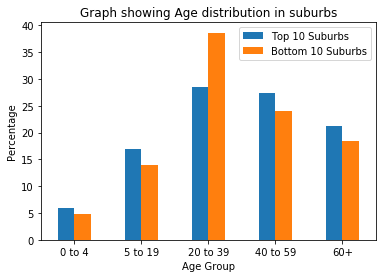

In [64]:
#Graphing the age demographics 
ax1 = age_summary_plot.plot.bar(rot=0)
ax1.set_ylabel("Percentage")
ax1.set_title("Graph showing Age distribution in suburbs")
ax1.figure.savefig('Age_distribution.png')

From the analysis above, it is clear that the bottom 10 performing subrubs have a higher proportion of 20-39 year olds. This is consistent with the hypothesis. 

Next, very similar analysis was done on the proportion of people holding jobs that require a tertiary qualification in comparison to people who do not hold jobs requiring a tertiary qualifications. This is shown below: 

In [65]:
#finding the number of people who hold both types of jobs in bottom and top performing suburbs
top_not_requiring=top_10_suburbs["Job Does not require a Tertiary qualification"].sum()
top_requiring=top_10_suburbs["Job requires Tertiary qualification"].sum()
bottom_not_requiring=bottom_10_suburbs["Job Does not require a Tertiary qualification"].sum()
bottom_requiring=bottom_10_suburbs["Job requires Tertiary qualification"].sum()

In [66]:
#summarising the values into a table
tertiary_summary_overall = pd.DataFrame(np.array([["Job requires Tertiary", top_requiring, bottom_requiring], ["Job does not require Tertiary", top_not_requiring, bottom_not_requiring]]),
                   columns=['Job requires Qualifications', 'Frequency Top', 'Frequency Bottom'])

In [67]:
#Mapping the values to a float so they can be used to calculate percentages 
tertiary_summary_overall['Frequency Top'] = tertiary_summary_overall['Frequency Top'].astype(float)
tertiary_summary_overall['Frequency Bottom'] = tertiary_summary_overall['Frequency Bottom'].astype(float)

In [68]:
#Obtaining the total so that percentages can be calculated
total_top1 = tertiary_summary_overall['Frequency Top'].sum()
total_bottom1 = tertiary_summary_overall['Frequency Bottom'].sum()


In [69]:
#Obtaining the percentage and dropping all columns that are not needed for the graph 
tertiary_summary_overall["Top 10 Suburbs"]=(tertiary_summary_overall['Frequency Top']/total_top1)*100
tertiary_summary_overall["Bottom 10 Suburbs"]=(tertiary_summary_overall['Frequency Bottom']/total_bottom1)*100
tertiary_summary_overall=tertiary_summary_overall.set_index('Job requires Qualifications')
tertiary_summary_plot=tertiary_summary_overall[["Top 10 Suburbs", 'Bottom 10 Suburbs']]



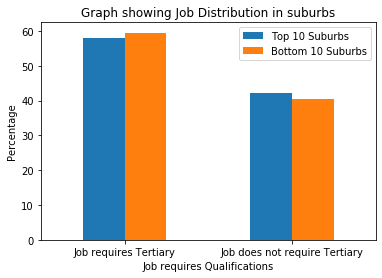

In [70]:
#Creating a graph
ax1 = tertiary_summary_plot.plot.bar(rot=0)
ax1.set_ylabel("Percentage")
ax1.set_title("Graph showing Job Distribution in suburbs")
ax1.figure.savefig('Tertiary_qualification.png')

As shown by the graph above, there does not seem to be much difference in the proportion of people who hold jobs requiring tertiary qualifications and the proportion of people not holding tertiary qualifications in the top 10 suburbs and bottom 10 suburbs. This does not support the hypothesis

Lastly, the proportion of people born in Australia and to the proportion of people not born in Australia will be compared in the top 10 suburbs and the bottom 10 suburbs using similar analysis. 

In [71]:
#finding the number of people born in Australia and born outside of Australia in top performing and bottom performing suburbs
top_outside_Aus=top_10_suburbs["Born outside of Australia"].sum()
top_in_Aus=top_10_suburbs["Born in Australia"].sum()
bottom_outside_Aus=bottom_10_suburbs["Born outside of Australia"].sum()
bottom_in_Aus=bottom_10_suburbs["Born in Australia"].sum()


In [72]:
#creating a table
migrant_summary_overall = pd.DataFrame(np.array([["Born within Aus", top_in_Aus, bottom_in_Aus], ["Born outside Aus", top_outside_Aus, bottom_outside_Aus]]),
                   columns=['Location where people are born', 'Frequency Top', 'Frequency Bottom'])

In [73]:
#mapping variables so it can be converted into a percentage 
migrant_summary_overall['Frequency Top'] = migrant_summary_overall['Frequency Top'].astype(float)
migrant_summary_overall['Frequency Bottom'] = migrant_summary_overall['Frequency Bottom'].astype(float)

In [74]:
#Converting values to a percentage
total_top1 = migrant_summary_overall['Frequency Top'].sum()
total_bottom1 = migrant_summary_overall['Frequency Bottom'].sum()

In [75]:
#Calculating percentages and adding it to the table
migrant_summary_overall["Top 10 Suburbs"]=(migrant_summary_overall['Frequency Top']/total_top)*100
migrant_summary_overall["Bottom 10 Suburbs"]=(migrant_summary_overall['Frequency Bottom']/total_bottom)*100
migrant_summary_overall=migrant_summary_overall.set_index('Location where people are born')


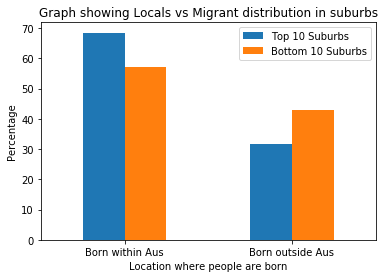

In [76]:
#Getting rid of  non-needed columns and plotting the graph
migrant_summary_plot=migrant_summary_overall[["Top 10 Suburbs", "Bottom 10 Suburbs"]]
ax1 = migrant_summary_plot.plot.bar(rot=0)
ylabel="Percentages"
ax1.set_ylabel("Percentage")
ax1.set_title("Graph showing Locals vs Migrant distribution in suburbs")
ax1.figure.savefig('Locals_migrants.png')

Overall, as expected from the hypothesis it can be observed that suburbs that were most impacted have a higher proportion of people born outside of Australia in comparison to the top 10 performing suburbs. 

In summary, it can be seen that the suburbs that experienced the highest drop in the median house price in April 2020 compared to January 2020 had a higher proportion of people who were in the 20-39 age group and had a higher proprtion of people born outside of Australia. This was consistent with the hypothesis. However, there does not seem to be much difference in the occupations held by people in the top performing suburbs and the bottom performing suburbs. 

QUESTION 3:  There was clearly some demographic differences in the suburbs that were most affected by the COVD-19 crises and the suburbs that were least affected. The next question focuses on answering whether these demographic differences seen above apply to all of Melbourne. 

Hypothesis: The hypothesis is that a negative correlation will be aobserved between suburbs  with a high proportion of migrants and suburbs where people hold jobs that do not require a tertiary qualification. On the other hand, suburbs with a high proportion of infants (indicating young families) would have fared better. 

In order to answer this, regression analysis was done with the change in house price as the dependent variables and migrant status, and different age groups as the independent variable. 

In [77]:
x=house_data_complete[["% holding Job requiring Tertiary", "Percent born outside of Aus", "Total Population", "% 0 to 4"]]
y=house_data_complete["House_price_delta"]
x=sm.add_constant(x)

In [78]:
model=sm.OLS(y, x).fit()

In [79]:
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      House_price_delta   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.549
Date:                Tue, 14 Jul 2020   Prob (F-statistic):            0.00147
Time:                        15:07:09   Log-Likelihood:                 241.80
No. Observations:                 244   AIC:                            -473.6
Df Residuals:                     239   BIC:                            -456.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0718      0.062      1.155      0.249      -0.051       0.194
% holding Job requiring Tertiary    -0.0016      0.001     -2.310      0.022      -0.003      -0.000
Percent born outside of Aus         -0.0011      0.001     -2.164      0.031      -0.002      -0.000
Total Population                   2.72e-07   6.41e-07      0.424      0.672   -9.91e-07    1.53e-06
% 0 to 4                             0.6558      0.375      1.747      0.082      -0.084       1.395
==============================================================================
Omnibus:                       72.925   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              606.956
Skew:                          -0.904   Prob(JB):                    1.59e-132
Kurtosis:                      10.512   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As pointed out above, there are some problems with this regression analysis. However, it is important to note that there is a positive correlation between the % 0 to 4 and changes in house price as expected. This indicates that people in suburbs who live in more long-term homes and less densely populated areas have not experienced the same drop in median house prices as a result of COVID-19. 

Scatterplots were then used to assess the correlation between change in house price and a number of different demograhic variables including proportion holding a job requiring a teritary qualification, proportion of people born outside Australia and proportion of people that are 0-4 (indicating the presence of younger families). 

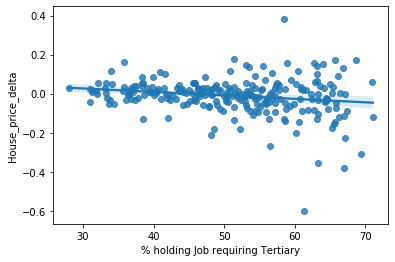

In [80]:
tertiary_job_delta=sns.regplot(house_data_complete["% holding Job requiring Tertiary"],house_data_complete["House_price_delta"])

In [81]:
fig3=tertiary_job_delta.get_figure()

In [82]:
fig3.savefig('tertiary_job_housedelta.png')

This is somewhat contrary to what we expected. It was believed that suburbs with less tertiary educated job holders would suffer a greater economic impact which would affect house prices. Need further research to determine why this does not appear to be the case.However, it supports prior results that there was not much difference in the proportion of people holding jobs requiring tertiary qualifications in top performing and bottom performing suburbs. 

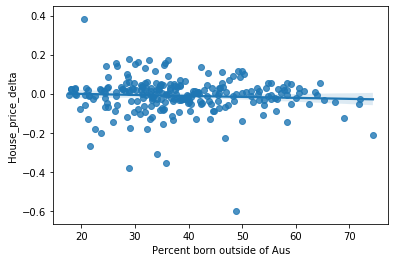

In [83]:
migration_delta=sns.regplot(house_data_complete["Percent born outside of Aus"],house_data_complete["House_price_delta"])

In [84]:
fig4=migration_delta.get_figure()

In [85]:
fig4.savefig('migration_housedelta.png')

We did expect a negative correlation between the proportion of the population born overseas and a negative change in house prices, based on the impact that Covid-19 has had on migration, international student demand and also foreign citizens on temporary working visas.

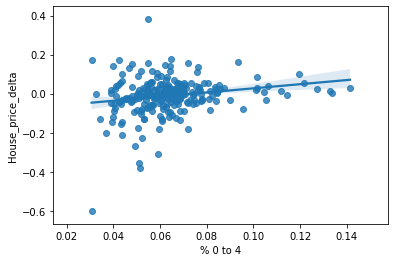

In [86]:
age_group_delta=sns.regplot(house_data_complete["% 0 to 4"],house_data_complete["House_price_delta"])

In [87]:
fig4=age_group_delta.get_figure()

In [88]:
fig4.savefig('age_group_delta.png')

The positive correlation was expected as young families live in suburbs that may be less densely populated. Furthermore, suburbs tend to have a lower proprtion of rentals which may also be a reason for the positive correlation between % age 0-4 and the change in median house price. 

Overall, the results were fairly consistent with the hypothesis. It was evident that suburbs that had a high proportion of people born outside of Australia experienced a higher drop in median house price and suburbs which had a higher proprtion of young families experienced an slight increase in house prices. However, it was unexpected to see the negative correlation between change in median house price and the proportion of people who hold jobs requiring tertiary qualifications.